In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv("datos_google_ads.csv") 

In [8]:
df.head

<bound method NDFrame.head of                                     Keyword Currency  Avg. monthly searches  \
0                     servicios financieros      ARS                  880.0   
1                          sector economico      ARS                 2400.0   
2                       sectores economicos      ARS                 2400.0   
3                        sector cuaternario      ARS                  880.0   
4    sector primario secundario y terciario      ARS                 1000.0   
..                                      ...      ...                    ...   
398          consultoria sector cuaternario      ARS                   10.0   
399                    la economia primaria      ARS                   10.0   
400               sector economico de claro      ARS                   10.0   
401            sector agropecuario economia      ARS                   10.0   
402          sectores de la economia social      ARS                   10.0   

    Three month chang

In [9]:
df.shape

(403, 26)

In [10]:
df.describe

<bound method NDFrame.describe of                                     Keyword Currency  Avg. monthly searches  \
0                     servicios financieros      ARS                  880.0   
1                          sector economico      ARS                 2400.0   
2                       sectores economicos      ARS                 2400.0   
3                        sector cuaternario      ARS                  880.0   
4    sector primario secundario y terciario      ARS                 1000.0   
..                                      ...      ...                    ...   
398          consultoria sector cuaternario      ARS                   10.0   
399                    la economia primaria      ARS                   10.0   
400               sector economico de claro      ARS                   10.0   
401            sector agropecuario economia      ARS                   10.0   
402          sectores de la economia social      ARS                   10.0   

    Three month c

In [11]:
df['Keyword'].duplicated().sum()

np.int64(0)

In [13]:
df = df.dropna(subset=['Competition (indexed value)'])

In [14]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,instituciones financieras cuales son,ARS,10.0,∞,∞,Low,29.0,NaN,NaN,NaN,...,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,10.0
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


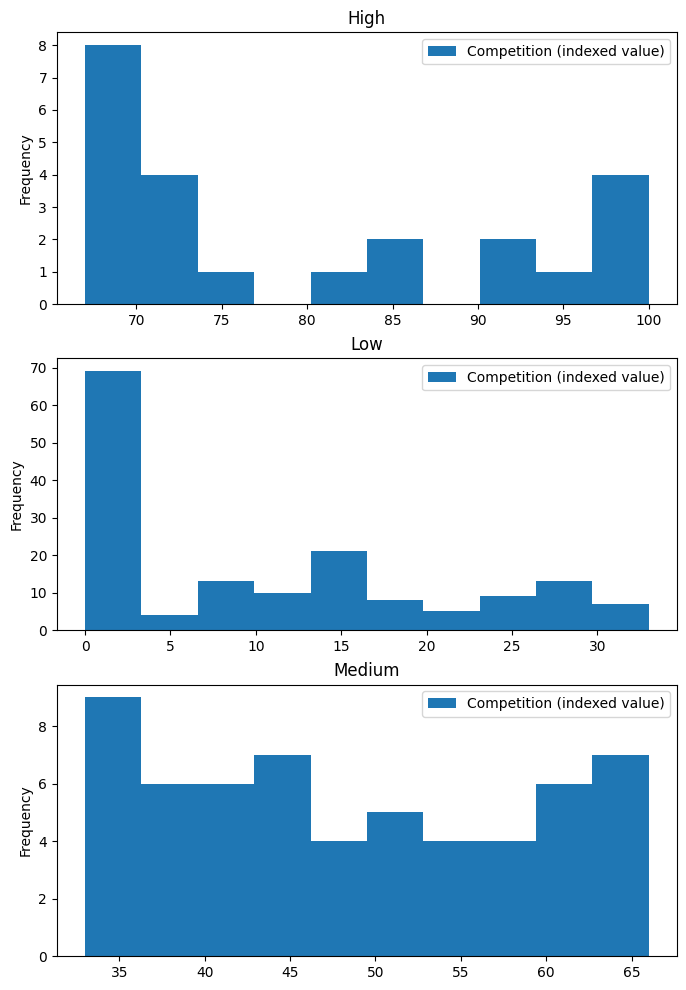

In [15]:
ax = df.plot.hist(column=["Competition (indexed value)"], by='Competition', bins=10, figsize=(8, 12))

<Axes: xlabel='Competition', ylabel='Avg. monthly searches'>

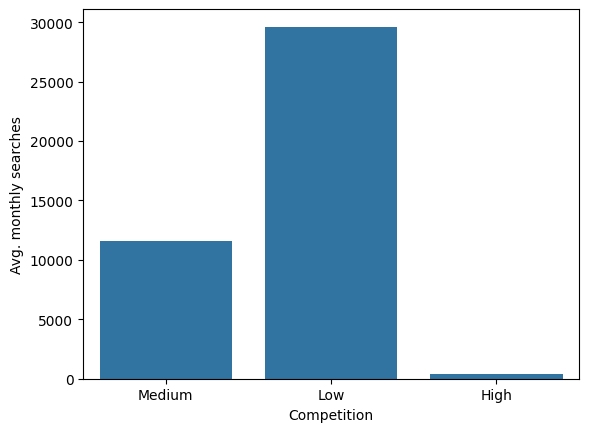

In [17]:
# graficar la suma de las busquedas prome para cada competencia

sns.barplot(data=df, x="Competition", y="Avg. monthly searches", errorbar=None, estimator=sum)

In [ ]:
# sql

In [18]:
from pandasql import sqldf
from sqlalchemy import engine

In [19]:
# función lambda que hace escribir funciones sql mucho más facil

In [20]:
pysqldf = lambda q: sqldf(q, globals())

In [21]:
# el espacio rompe el motor sql dentro de python
df = df.rename(columns={"Avg. monthly searches": "avg_searches", "Competition (indexed value)": "competition_index"})

In [22]:
q = "SELECT Keyword, avg_searches, Competition, competition_index FROM df WHERE avg_searches >=500"

df_export = pysqldf(q)

In [23]:
df_export.to_csv('prueba.csv')

In [24]:
df_export

,Keyword,avg_searches,Competition,competition_index
0,servicios financieros,880.0,Medium,36.0
1,sector economico,2400.0,Low,0.0
2,sectores economicos,2400.0,Low,0.0
3,sector cuaternario,880.0,Low,0.0
4,sector primario secundario y terciario,1000.0,Low,0.0
5,sectores de la economia,1000.0,Low,1.0
6,sector terciario ejemplos,880.0,Low,0.0
7,entidades financieras,720.0,Low,25.0
8,economia informal,720.0,Low,1.0
9,financieros,4400.0,Medium,37.0
